### Example 2: arbitrary object

The arbitrary object placed inside $[-6.0, 6.0] \times [-6.0, 6.0]$ mm$^2$ physical domain, is illuminated by a 30-degree plane wave. The grid spacing was set to $h = 0.2$ mm in both x- and y-directions.

In [1]:
import pyhelmholtzfd

# physical domain and grid spacing
domain = (-6.0e-3, 6.0e-3, -6.0e-3, 6.0e-3) # [m]
h = 0.2e-3 # [m]

epsr1, epsr2, epsr3 = 1.2, 1.5, 1.4
geo1 = -3.0e-3, 3.0e-3, -3.0e-3, 3.0e-3    # [m]
geo2 = 0.6e-3, 2.0e-3, 0.6e-3, 2.0e-3      # [m]
geo3 = -2.0e-3, -0.6e-3, -2.0e-3, -0.6e-3  # [m]

model = pyhelmholtzfd.Simulation(domain, h)
model.objectinfo("rectangle", geo1, epsr1)
model.objectinfo("rectangle", geo2, epsr2)    
model.objectinfo("rectangle", geo3, epsr3)

In [2]:
# frequency (Hz) and amplitude of the planewave
freq, amp = 0.1e12, 1.0

# zero-phase at the origin 
xs, ys = 0.0, 0.0 # [m]

# incident angle
theta = 30 # [deg]

# define the source's parameters used in the simulation
src = ("PW", freq, amp, xs, ys, theta)
model.source(src)

In [3]:
# define the finite difference schemes
hhorder, oworder = "2nd-central", "2nd-onesided"

# define the parameters for the HABC method
weight, N = "quadratic", 10
owparam = ("MUR2", N, weight)

model.boundarycondition(owparam)
model.fdscheme(hhorder, oworder)

In [4]:
# run the simulation
ui, us, ut = model.hhsolver()

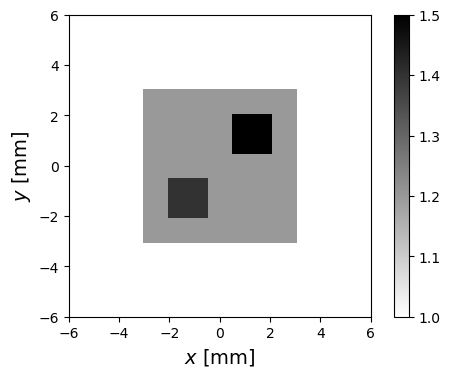

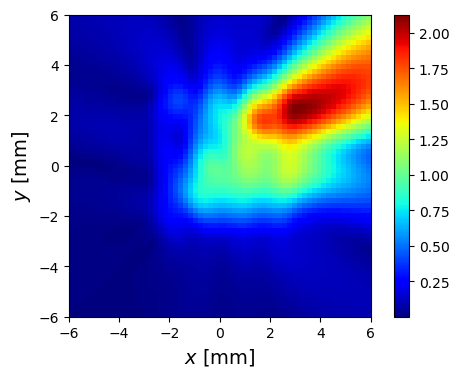

In [5]:
# visualize the results
model.viz("object", scale=1.0e-3, unit="mm")
model.viz("sc", scale=1.0e-3, unit="mm")